<a href="https://colab.research.google.com/github/SiddTayi/ML-Projects/blob/main/RTD_FM_Det.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
##Install dependecies
import os
os.chdir("/content/drive/My Drive/RTD_FM/") 
Dataset = 'Mask dataset/Dataset'
train_dir = 'Mask dataset/Dataset/TRAIN'
test_dir = 'Mask dataset/Dataset/TEST'

print(len(train_dir))
#Dataset = 'Imgs'
#Masked = 'Images/Mask'
#Masked_dir = os.listdir(Masked)
Data_Dir = os.listdir(Dataset)
print(Data_Dir)
#print(len(Masked_dir))

26
['without_mask', 'with_mask', 'TEST', 'TRAIN']


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt





In [ ]:

img_rows, img_cols = 300,300
 
images = []
labels = []

for category in Data_Dir:
  folder_path = os.path.join(Dataset, category)
  #print(folder_path)
  for img in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img)
    img = cv2.imread(img_path)
    #print(img_path[10:])  #read every image from the dataset

    try:
      #converting BGR to gray scale
      grayscale_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      #resizing the image to 112x112
      resized_img = cv2.resize(grayscale_img,(img_rows, img_cols))
      images.append(resized_img)
      labels.append(category)
    
    except Exception as e:
      print("Excpetion: ",e)


In [ ]:
images = np.array(images)/255.0
images = np.reshape(images, (images.shape[0], img_rows, img_cols,1))

#One hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels = np.array(labels)

(train_x, test_x, train_y, test_y) = train_test_split(images, labels, test_size = 0.25, random_state = 0)


Build a CNN model


In [ ]:
from keras.models import Sequential 
from keras.layers import Dense, Activation, Flatten, Dropout
from keras.layers import Conv2D ,MaxPooling2D

#model Parameters
num_classes = 2
batch_size = 64


# Build a CNN model
model = Sequential()

#layer 1
model.add(Conv2D(128,(3,3),input_shape=(img_rows, img_cols,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#layer2
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#Dropouts
model.add(Flatten())
model.add(Dropout(0.6))

#softmax Classifier
model.add(Dense(32,activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

# model = tf.keras.models.Sequential([
#                                     tf.keras.layers.Conv2D(16,(3,3),activation = 'relu', input_shape = (112,112,1)),
#                                     tf.keras.layers.MaxPooling2D(2,2),
#                                     tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
#                                     tf.keras.layers.MaxPooling2D(2,2),
#                                     tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
#                                     tf.keras.layers.MaxPooling2D(2,2),
#                                     tf.keras.layers.Flatten(),
#                                     tf.keras.layers.Dense(512,activation = 'relu'),
#                                     tf.keras.layers.Dense(2,activation = 'sigmoid')
                              

# ])

print(model.summary())



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 128)     1280      
_________________________________________________________________
activation (Activation)      (None, 298, 298, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 128)     147584    
_________________________________________________________________
activation_1 (Activation)    (None, 147, 147, 128)     0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        7

In [ ]:
# #Using ImageDataGenerator
#  aug = ImageDataGenerator{
#      rotation_range = 20,
#      zoom_width = 0.15,
#      width_shift_range = 0.2,
#      height_shift_range = 0.2,
#      shear_range = 0.15,
#      horizontal_flip = True,
#      fill_mode = "nearest"
#  }

#  baseModel = MobileNetV2(weights = 'imagenet', include_top = False, input_tensor = Input(shape = (224,224,3)))

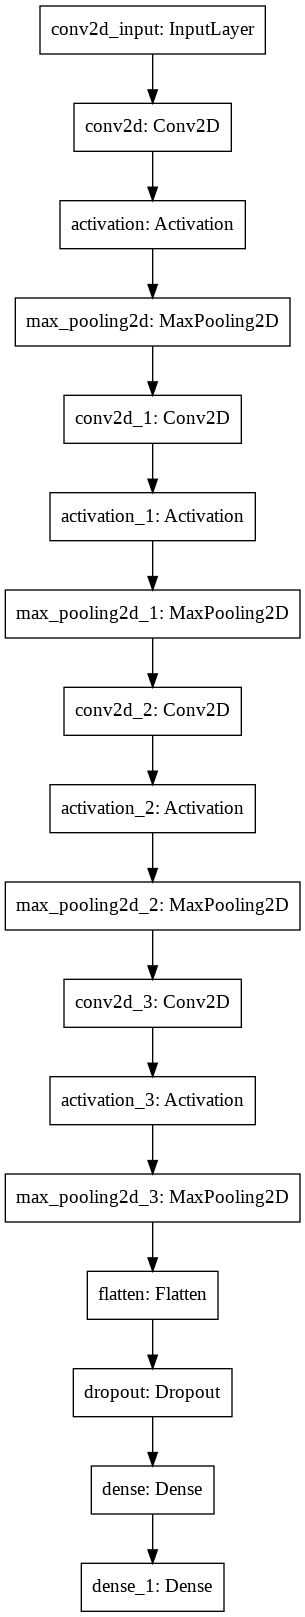

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='Face_mask_Det_architecture.png')

Training the Model
    

In [ ]:
from keras.optimizers import Adam,RMSprop

epochs = 10

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics = ['accuracy']
              )

fit_model = model.fit(train_x, train_y,
                      epochs = epochs, 
                      validation_split = 0.25)

Epoch 1/10
15/15 [==============================] - 47s 784ms/step - loss: 0.6989 - accuracy: 0.5083 - val_loss: 0.6813 - val_accuracy: 0.5298
Epoch 2/10
15/15 [==============================] - 7s 488ms/step - loss: 0.6642 - accuracy: 0.5850 - val_loss: 0.6779 - val_accuracy: 0.6159
Epoch 3/10
15/15 [==============================] - 7s 487ms/step - loss: 0.6537 - accuracy: 0.6183 - val_loss: 0.6542 - val_accuracy: 0.6821
Epoch 4/10
15/15 [==============================] - 7s 485ms/step - loss: 0.5917 - accuracy: 0.7140 - val_loss: 0.5440 - val_accuracy: 0.6755
Epoch 5/10
15/15 [==============================] - 7s 485ms/step - loss: 0.4550 - accuracy: 0.8040 - val_loss: 0.5296 - val_accuracy: 0.7219
Epoch 6/10
15/15 [==============================] - 7s 484ms/step - loss: 0.3471 - accuracy: 0.8680 - val_loss: 0.4748 - val_accuracy: 0.7682
Epoch 7/10
15/15 [==============================] - 7s 484ms/step - loss: 0.2466 - accuracy: 0.9106 - val_loss: 0.4105 - val_accuracy: 0.8278
Epoch

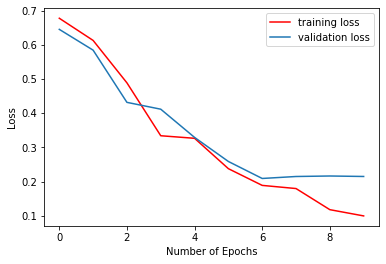

In [ ]:
plt.plot(fit_model.history['loss'],'r', label = 'training loss')
plt.plot(fit_model.history['val_loss'], label = 'validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

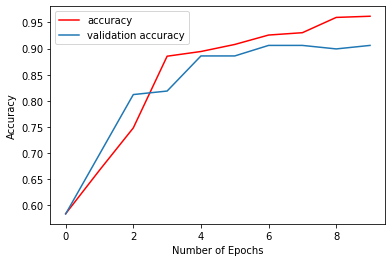

In [ ]:
plt.plot(fit_model.history['accuracy'],'r', label = 'accuracy')
plt.plot(fit_model.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
model.save('RTD_face-mask_detection.h5')